# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

> Indented block

<!-- 
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "pooja2610"
kaggle_key = "c021ab70d17d0f4c47cb47d0e8961263"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
#!unzip -o bike-sharing-demand.zip

train.csv: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=['datetime'])
import pandas as pd


train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
import pandas as pd
test = pd.read_csv('test.csv',parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train=train.drop(['casual','registered'],axis=1)


In [ ]:
predictor = TabularPredictor(label='count',problem_type='regression',eval_metric="root_mean_squared_error"
).fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20211116_133402/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211116_133402/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12709.41 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Genera

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	41.97s	 = Training   runtime
	2.57s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 349.09s of the 549.11s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.22s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 334.77s of the 534.79s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	8.28s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.753479       7.506784  468.717594                0.000695           0.344529            3       True         18
1   NeuralNetFastAI_BAG_L2 -115.385868       6.552142  433.180768                0.360606         105.585790            2       True         16
2        LightGBMXT_BAG_L2 -116.156043       6.432847  337.811325                0.241312          10.216347            2       True         11
3          CatBoost_BAG_L2 -116.499032       6.228719  352.867994                0.037184          25.273016            2       True         14
4          LightGBM_BAG_L2 -116.810135       6.274627  334.355132                0.083092           6.760154            2       True         12
5           XGBoost_BAG_L2 -117.325820       6.274102  338.753741         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.753479  ...       True         18
 1   NeuralNetFastAI_BAG_L2 -115.385868  ...       True         16
 2        LightGBMXT_BAG_L2 -116.156043  ...       True         11
 3          CatBoost_BAG_L2 -116.499032  ...       True         14
 4          LightGBM_BAG_L2 -116.810135  ...       True         12
 5           XGBoost_BAG_L2 -117.325820  ...       True         17
 6     ExtraTreesMSE_BAG_L2 -117.693333  ...       True         15
 7      WeightedEnsemble_L2 -118.417483  ...       True         10
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -119.650663  ...       True         13
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          8
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0     96.594063
1     95.236404
2     95.237732
3    108.957314
4    108.891151
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      211.503616
std       128.770859
min       -13.745405
25%       106.482010
50%       194.102615
75%       298.819183
max       651.127441
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
count=0
for i in predictions:
  if i<0:
    count=count+1
print(count)

3


In [ ]:

# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6496.000000
mean      211.411499
std       128.812429
min         0.000000
25%       106.479851
50%       193.992989
75%       298.740723
max       651.127441
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 242k/242k [00:00<00:00, 678kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2021-11-16 13:50:04  first raw submission  complete  1.39401      1.39401       
submission.csv  2021-11-16 13:45:51  first raw submission  error     None         None          
submission.csv  2021-11-14 14:41:22  first raw submission  error     None         None          


#### Initial score of 1.39

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d0152ff50>,
      dtype=object)

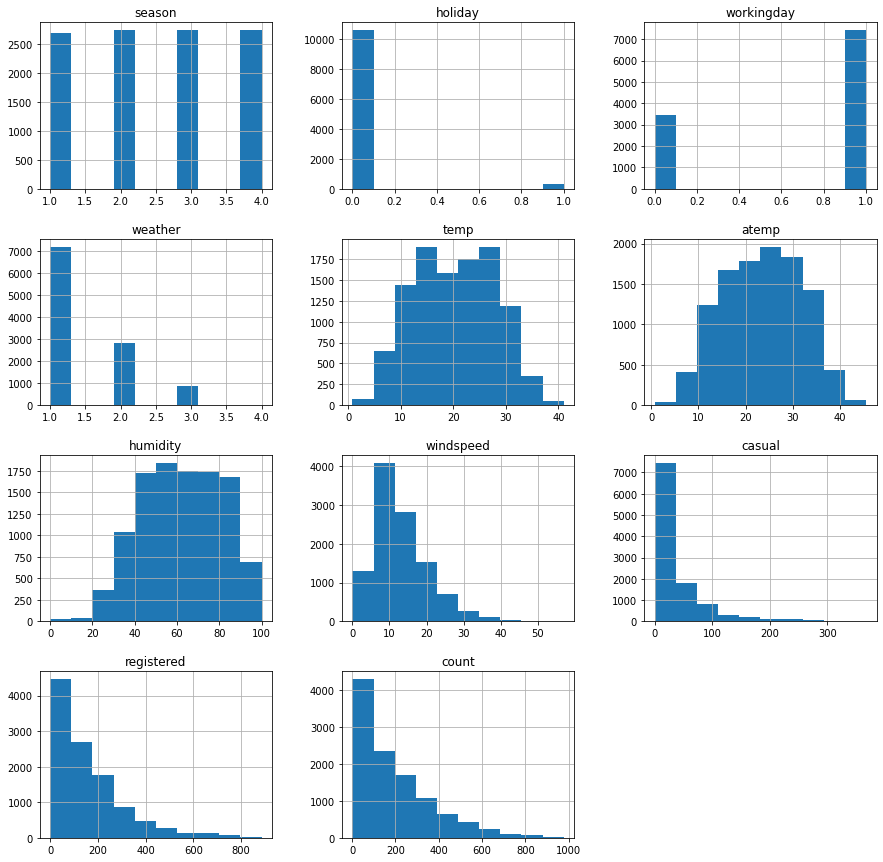

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

In [ ]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour


test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=train['datetime'].dt.hour
test['year'] = test['datetime'].dt.year


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')


In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ba2af7b90>,
      dtype=object)

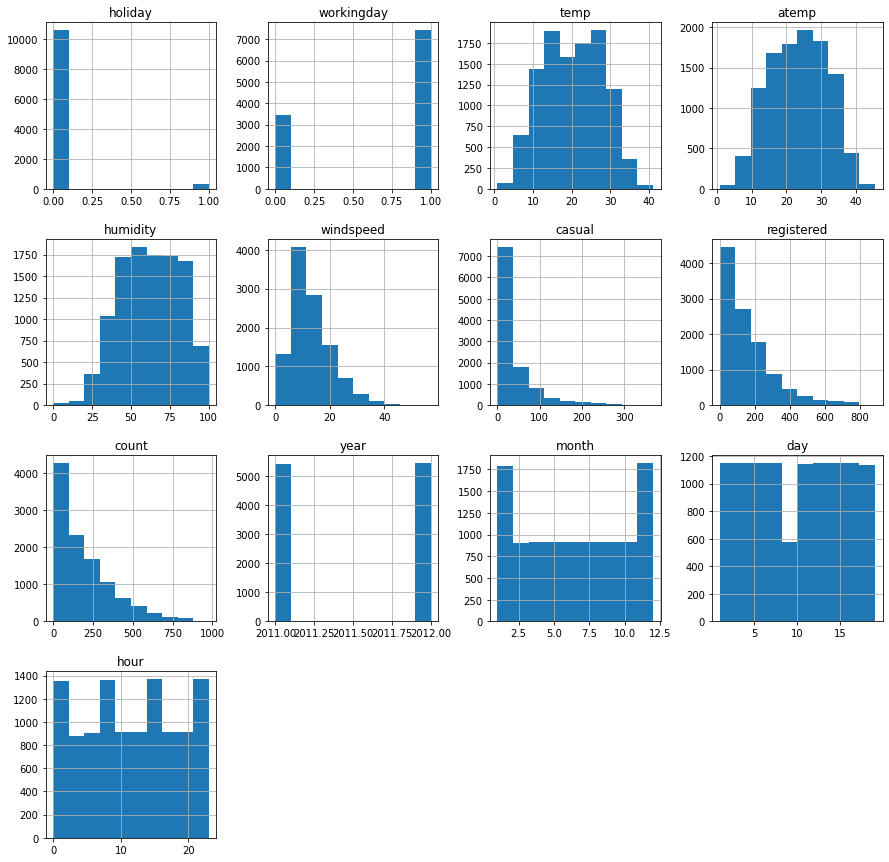

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count",problem_type = "regression", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": 
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220111_111824/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220111_111824/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12703.05 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatur

[1000]	train_set's rmse: 30.8186	valid_set's rmse: 38.4291
[2000]	train_set's rmse: 25.4239	valid_set's rmse: 36.1393
[3000]	train_set's rmse: 22.5686	valid_set's rmse: 35.6903
[4000]	train_set's rmse: 20.5877	valid_set's rmse: 35.5711
[5000]	train_set's rmse: 19.0435	valid_set's rmse: 35.5486


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3019	valid_set's rmse: 41.0917
[2000]	train_set's rmse: 25.4089	valid_set's rmse: 38.7923
[3000]	train_set's rmse: 22.682	valid_set's rmse: 38.0445
[4000]	train_set's rmse: 20.7477	valid_set's rmse: 37.6701
[5000]	train_set's rmse: 19.2301	valid_set's rmse: 37.5143
[6000]	train_set's rmse: 18.0161	valid_set's rmse: 37.3559
[7000]	train_set's rmse: 16.9715	valid_set's rmse: 37.2906
[8000]	train_set's rmse: 16.0611	valid_set's rmse: 37.2206
[9000]	train_set's rmse: 15.2683	valid_set's rmse: 37.1952
[10000]	train_set's rmse: 14.5678	valid_set's rmse: 37.1924


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8968	valid_set's rmse: 35.5721
[2000]	train_set's rmse: 25.8631	valid_set's rmse: 34.288
[3000]	train_set's rmse: 23.0637	valid_set's rmse: 34.1613


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.1963	valid_set's rmse: 41.0073
[2000]	train_set's rmse: 25.1657	valid_set's rmse: 39.5208
[3000]	train_set's rmse: 22.4714	valid_set's rmse: 38.891
[4000]	train_set's rmse: 20.6602	valid_set's rmse: 38.6141
[5000]	train_set's rmse: 19.2024	valid_set's rmse: 38.3924
[6000]	train_set's rmse: 18.0244	valid_set's rmse: 38.232
[7000]	train_set's rmse: 16.9892	valid_set's rmse: 38.0679
[8000]	train_set's rmse: 16.0734	valid_set's rmse: 37.9926
[9000]	train_set's rmse: 15.292	valid_set's rmse: 37.9346
[10000]	train_set's rmse: 14.5874	valid_set's rmse: 37.8583


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7161	valid_set's rmse: 38.2675
[2000]	train_set's rmse: 25.5034	valid_set's rmse: 36.7964
[3000]	train_set's rmse: 22.7183	valid_set's rmse: 36.6083


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3783	valid_set's rmse: 42.1922
[2000]	train_set's rmse: 25.4027	valid_set's rmse: 40.825
[3000]	train_set's rmse: 22.6044	valid_set's rmse: 40.6565
[4000]	train_set's rmse: 20.6399	valid_set's rmse: 40.551


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.6785	valid_set's rmse: 38.6888
[2000]	train_set's rmse: 25.6628	valid_set's rmse: 35.913
[3000]	train_set's rmse: 22.8607	valid_set's rmse: 35.0407
[4000]	train_set's rmse: 20.8954	valid_set's rmse: 34.7444
[5000]	train_set's rmse: 19.3693	valid_set's rmse: 34.6106
[6000]	train_set's rmse: 18.0937	valid_set's rmse: 34.5086
[7000]	train_set's rmse: 17.0039	valid_set's rmse: 34.5219


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7847	valid_set's rmse: 40.0936
[2000]	train_set's rmse: 25.4609	valid_set's rmse: 38.335
[3000]	train_set's rmse: 22.6799	valid_set's rmse: 37.7931
[4000]	train_set's rmse: 20.8023	valid_set's rmse: 37.6372
[5000]	train_set's rmse: 19.2946	valid_set's rmse: 37.4755
[6000]	train_set's rmse: 18.0187	valid_set's rmse: 37.3536
[7000]	train_set's rmse: 16.9566	valid_set's rmse: 37.3147
[8000]	train_set's rmse: 16.0353	valid_set's rmse: 37.2951
[9000]	train_set's rmse: 15.2295	valid_set's rmse: 37.2903
[10000]	train_set's rmse: 14.5042	valid_set's rmse: 37.3442


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.2598	valid_set's rmse: 40.7273
[2000]	train_set's rmse: 25.2682	valid_set's rmse: 39.8782
[3000]	train_set's rmse: 22.5407	valid_set's rmse: 39.8429


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0398	valid_set's rmse: 37.6854
[2000]	train_set's rmse: 25.8317	valid_set's rmse: 35.4668
[3000]	train_set's rmse: 23.0887	valid_set's rmse: 34.8136
[4000]	train_set's rmse: 21.1229	valid_set's rmse: 34.5371
[5000]	train_set's rmse: 19.5767	valid_set's rmse: 34.3685
[6000]	train_set's rmse: 18.3516	valid_set's rmse: 34.2276
[7000]	train_set's rmse: 17.2755	valid_set's rmse: 34.2726


	-36.8251	 = Validation score   (root_mean_squared_error)
	86.19s	 = Training   runtime
	5.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 296.31s of the 496.32s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.556
[2000]	train_set's rmse: 15.5229	valid_set's rmse: 35.4489


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9388
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1223
[3000]	train_set's rmse: 12.2068	valid_set's rmse: 35.9677
[4000]	train_set's rmse: 9.97753	valid_set's rmse: 35.9639


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4253	valid_set's rmse: 33.0295


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.0987
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1129
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7212
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6786


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.43	valid_set's rmse: 37.371
[2000]	train_set's rmse: 15.5136	valid_set's rmse: 36.986


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9541


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0051	valid_set's rmse: 35.6024
[2000]	train_set's rmse: 15.4015	valid_set's rmse: 34.9824


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3245
[2000]	train_set's rmse: 15.6834	valid_set's rmse: 35.8282
[3000]	train_set's rmse: 12.2992	valid_set's rmse: 35.5694
[4000]	train_set's rmse: 10.1773	valid_set's rmse: 35.5318


	-36.5863	 = Validation score   (root_mean_squared_error)
	32.75s	 = Training   runtime
	1.6s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 257.95s of the 457.96s of remaining time.
	-41.3243	 = Validation score   (root_mean_squared_error)
	11.54s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 244.38s of the 444.39s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 187.77s of the 387.78s of remaining time.
	-41.0311	 = Validation score   (root_mean_squared_error)
	4.55s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 181.47s of the 381.48s of remaining time.
	-45.8747	 = Validation score   (root_mean_squared_error)
	118.21s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up 

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.089724       9.907979  447.051784                0.000772           0.357515            3       True         17
1      WeightedEnsemble_L2  -35.155181       7.861544  282.314689                0.000679           0.382156            2       True          9
2          CatBoost_BAG_L2  -35.443790       8.803843  320.705511                0.065298          34.168248            2       True         13
3     ExtraTreesMSE_BAG_L2  -35.517440       9.299206  294.516719                0.560661           7.979455            2       True         14
4          LightGBM_BAG_L2  -35.528998       8.874961  293.764409                0.136416           7.227146            2       True         11
5   NeuralNetFastAI_BAG_L2  -35.591753       9.144832  397.319421         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -35.089724  ...       True         17
 1      WeightedEnsemble_L2  -35.155181  ...       True          9
 2          CatBoost_BAG_L2  -35.443790  ...       True         13
 3     ExtraTreesMSE_BAG_L2  -35.517440  ...       True         14
 4          LightGBM_BAG_L2  -35.528998  ...       True         11
 5   NeuralNetFastAI_BAG_L2  -35.591753  ...       True         15
 6        LightGBMXT_BAG_L2  -36.020812  ...       True         10
 7           XGBoost_BAG_L2  -36.022886  ...       True         16
 8   RandomForestMSE_BAG_L2  -36.110314  ...       True         12
 9          LightGBM_BAG_L1  -36.586278  ...       True          4
 10       LightGBMXT_BAG_L1  -36.825093  ...       True          3
 11          XGBoost_BAG_L1  -37.415292  ...       True          8
 12    ExtraTreesMSE_BAG_L1  -41.031078  ...       True          6
 13  RandomForestMSE_BAG_L1  -41.324329  ...   

In [ ]:
# Remember to set all negative values to zero
predictions=predictor_new_features.predict(test)
predictions.head()

0    13.363194
1     5.354025
2     3.975491
3     4.177305
4     4.689063
Name: count, dtype: float32

In [ ]:
# How many negative values do we have?
count=0
for i in predictions:
    if i < 0:
        count=count+1
        
print(count)

0


In [ ]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])


submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

100% 188k/188k [00:00<00:00, 528kB/s]
Successfully submitted to Bike Sharing DemandWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-01-11 11:35:50  new features                       complete  1.77415      1.77415       
submission_new_features.csv  2022-01-11 11:31:38  new features                       complete  1.77415      1.77415       
submission_new_hpo.csv       2022-01-09 13:14:10  new features with hyperparameters  complete  1.68015      1.68015       


#### New Score of `1.77`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:

num_trials = 5
search_strategy = 'auto'
hyperparameters = {
    'NN': {'num_epochs': 20, 'batch_size': 32}, 
    'GBM': {'num_boost_round': 50}
}
hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="root_mean_squared_error", 
        learner_kwargs={"ignored_columns": ["casual", "registered"]}
    ).fit(
        train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220109_130202/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220109_130202/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12694.4 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 1)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-113.8317	 = Validation score   (root_mean_squared_error)
	9.11s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 384.65s of the 584.65s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be remove

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 0)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-54.6645	 = Validation score   (root_mean_squared_error)
	4.94s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 206.73s of the 206.71s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed

In [ ]:

predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3 -45.609293       6.095589  565.921915                0.000878           0.333063            3       True         14
1         LightGBM_BAG_L2/T4 -47.053868       3.295116  377.982015                0.117488           3.073586            2       True         12
2         LightGBM_BAG_L2/T3 -47.244420       3.291203  377.940292                0.113575           3.031863            2       True         11
3         LightGBM_BAG_L2/T0 -47.637622       3.298383  377.893236                0.120755           2.984807            2       True          8
4   NeuralNetMXNet_BAG_L2/T0 -48.301893       5.842224  559.566486                2.664596         184.658057            2       True         13
5         LightGBM_BAG_L2/T1 -50.359230       3.291871  377.922930  

{'leaderboard':                        model  score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3 -45.609293  ...       True         14
 1         LightGBM_BAG_L2/T4 -47.053868  ...       True         12
 2         LightGBM_BAG_L2/T3 -47.244420  ...       True         11
 3         LightGBM_BAG_L2/T0 -47.637622  ...       True          8
 4   NeuralNetMXNet_BAG_L2/T0 -48.301893  ...       True         13
 5         LightGBM_BAG_L2/T1 -50.359230  ...       True          9
 6        WeightedEnsemble_L2 -53.204983  ...       True          7
 7         LightGBM_BAG_L1/T3 -53.478120  ...       True          4
 8         LightGBM_BAG_L2/T2 -53.489226  ...       True         10
 9         LightGBM_BAG_L1/T1 -54.676179  ...       True          2
 10        LightGBM_BAG_L1/T0 -54.692703  ...       True          1
 11        LightGBM_BAG_L1/T2 -55.506280  ...       True          3
 12        LightGBM_BAG_L1/T4 -62.521667  ...       True          5
 13  NeuralNetMXNet_BAG_L1/T0 -76

In [ ]:
# Remember to set all negative values to zero 
predictions=predictor_new_hpo.predict(test)
predictions.head()


0    24.396503
1    14.996004
2    13.902639
3    13.899763
4    13.984074
Name: count, dtype: float32

In [ ]:

for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6493.000000
mean      184.654724
std       159.398758
min        13.280485
25%        58.646320
50%       145.382690
75%       253.451294
max       857.280640
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 115kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-01-09 13:14:10  new features with hyperparameters  complete  1.68015      1.68015       
submission_new_features.csv  2022-01-09 12:42:42  new features                       complete  1.76703      1.76703       
submission_new_features.csv  2022-01-09 12:20:52  new features                       error     None         None          


#### New Score of `1.68`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

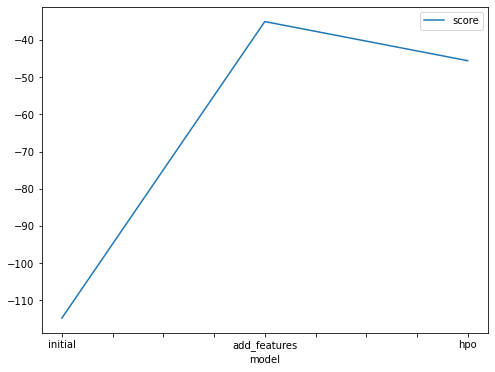

In [2]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
import pandas as pd
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.75, -35.089, -45.60]
    }
).plot(x="model", y="score", figsize=(8,6)).get_figure()
fig.savefig('model_train_score.png')

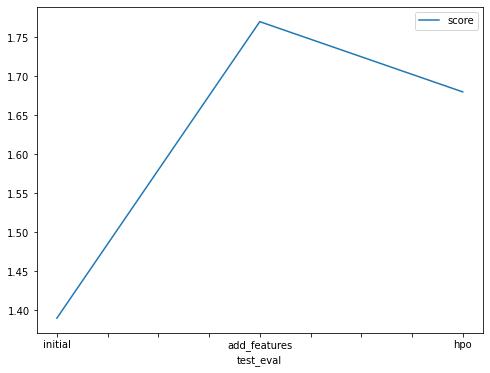

In [3]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39, 1.77,1.68 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_trials": ["default", "default", 5],
    "scheduler": ["default", "default", "local"],
    "searcher": ["default", "default", "auto"],
    "time_limit": [600, 600, 600],
    "hyperparameters": ["default", "default", "NN[20], GBM[50]"],
    "score": [1.39, 1.74, 1.68]
})

,model,num_trials,scheduler,searcher,time_limit,hyperparameters,score
0,initial,default,default,default,600,default,1.39
1,add_features,default,default,default,600,default,1.74
2,hpo,5,local,auto,600,"NN[20], GBM[50]",1.68
